In [39]:
library(MMWRweek)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)
library(zoo)

find_median = function(values, dates, train_before="2019-10-01") {
    idx = dates < train_before
    state_deaths = data.frame(weeks=MMWRweek(data$WeekDate)$MMWRweek, values=values, dates=dates)
    median = state_deaths[idx,] %>% group_by(weeks) %>% summarise(med = median(values, na.rm=TRUE))
    merged = merge(state_deaths, median, by="weeks")
    merged$med[order(merged$dates)]
}
find_quantile = function(values, dates, q = .95, train_before="2019-10-01", before_month=6) {
    idx = dates < train_before
    state_deaths = data.frame(weeks=MMWRweek(data$WeekDate)$MMWRweek, values=values, dates=dates)
    median = state_deaths[idx,] %>% group_by(weeks) %>% summarise(est = quantile(values, probs=c(q), na.rm=TRUE))
    merged = merge(state_deaths, median, by="weeks")
    merged$est[order(merged$dates)]
}
find_sd = function(values, dates, train_before="2019-10-01", before_month=6) {
    idx = dates < train_before
    state_deaths = data.frame(weeks=MMWRweek(data$WeekDate)$MMWRweek, values=values, dates=dates)
    std = state_deaths[idx,] %>% group_by(weeks) %>% summarise(std = sd(values, na.rm=TRUE) / sqrt(length(values)))
    merged = merge(state_deaths, std, by="weeks")
    merged$std[order(merged$dates)]
}
# set path as needed

#setwd("~/RawData/OutFiles")

# Trends calculated in 2 ways:
# 1. Median quantiles
# 2. Quantile regression with week as predictor and splines as smoothers


data = read.csv("~/animal_mortality/RawData/dogs.csv", sep=";")
data$WeekDate = as.Date((data$date), format="%d.%m.%Y")
data$Count = rowMeans(data[,c("prevalence_since_2019", "prop_unwell")], na.rm=T)
data = data[MMWRweek(data$WeekDate)$MMWRweek != 53,]
head(data)

,date,prevalence_merged_linreg,prop_unwell,prevalence_since_2019,WeekDate,Count
,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>
1,01.01.2017,10.3670,10.3670,NA,2017-01-01,10.3670
2,08.01.2017,9.4312,9.4312,NA,2017-01-08,9.4312
3,15.01.2017,9.4312,9.4312,NA,2017-01-15,9.4312
4,22.01.2017,9.1376,9.1376,NA,2017-01-22,9.1376
5,29.01.2017,10.0367,10.0367,NA,2017-01-29,10.0367
6,05.02.2017,10.5688,10.5688,NA,2017-02-05,10.5688


In [40]:
unique(MMWRweek(data$WeekDate)$MMWRweek)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52

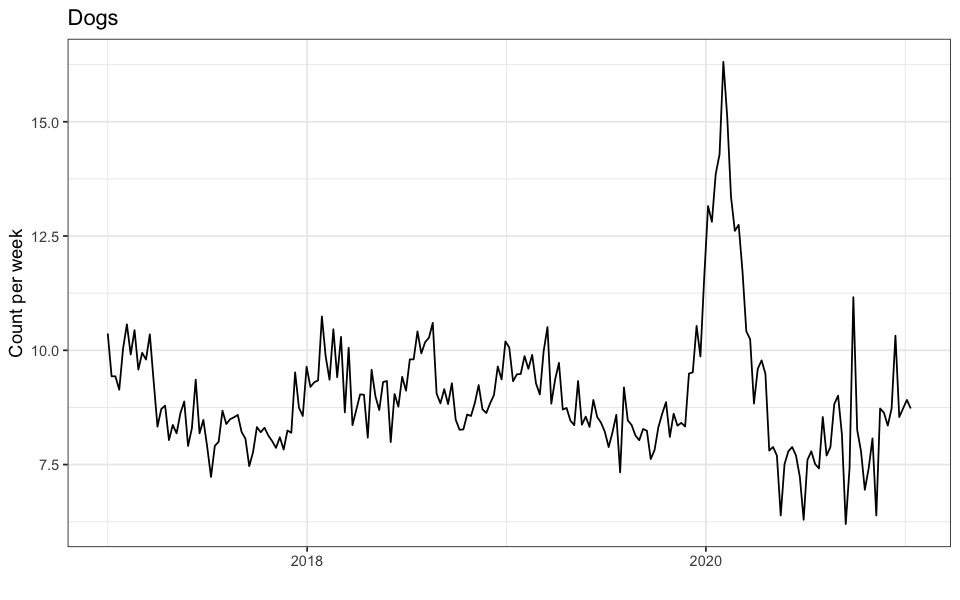

In [41]:
theme_set(theme_bw())
ggplot(data)+
  geom_line(aes(x=WeekDate,y=Count))+
scale_x_date(#limits = c(as.Date("2019-01-01"), NA),
    date_breaks = '2 year', date_labels = '%Y')+
  labs(title = 'Dogs',
       #subtitle ='',
       #caption = '',
       x = '', y="Count per week")

In [42]:
dates = data$WeekDate
values = data$Count
idx = dates < "2019-10-01"
state_deaths = data.frame(weeks=MMWRweek(data$WeekDate)$MMWRweek, values=values, dates=dates)
median = state_deaths[idx,] %>% group_by(weeks) %>% summarise(med = median(values, na.rm=TRUE))
merged = merge(state_deaths, median, by="weeks")
merged$med[order(merged$dates)]

[1] 10.193700  9.431200  9.323441  9.342100 10.036700  9.873381  9.594311
  [8] 10.440400  9.412000  9.945000  9.798200 10.348600  8.832507  8.699000
 [15]  9.035700  8.789000  8.089700  8.461780  8.361974  8.693200  8.880700
 [22]  8.549387  8.293600  9.043800  8.541237  8.477100  8.217317  7.883290
 [29]  8.205067  8.588044  8.678900  9.186934  8.493700  8.533800  8.587200
 [36]  8.213500  8.278467  8.239810  7.773100  8.320300  8.234500  8.287450
 [43]  8.364950  8.287450  8.356750  8.668750  8.269100  8.436250  8.517850
 [50]  9.268100  9.196750  8.962300 10.193700  9.431200  9.323441  9.342100
 [57] 10.036700  9.873381  9.594311 10.440400  9.412000  9.945000  9.798200
 [64] 10.348600  8.832507  8.699000  9.035700  8.789000  8.089700  8.461780
 [71]  8.361974  8.693200  8.880700  8.549387  8.293600  9.043800  8.541237
 [78]  8.477100  8.217317  7.883290  8.205067  8.588044  8.678900  9.186934
 [85]  8.493700  8.533800  8.587200  8.213500  8.278467  8.239810  7.773100
 [92]  8.320300  8.234500  8.287450  8.364950  8.287450  8.356750  8.668750
 [99]  8.269100  8.436250  8.517850  9.268100  9.196750  8.962300 10.193700
[106]  9.431200  9.323441  9.342100 10.036700  9.873381  9.594311 10.440400
[113]  9.412000  9.945000  9.798200 10.348600  8.832507  8.699000  9.035700
[120]  8.789000  8.089700  8.461780  8.361974  8.693200  8.880700  8.549387
[127]  8.293600  9.043800  8.541237  8.477100  8.217317  7.883290  8.205067
[134]  8.588044  8.678900  9.186934  8.493700  8.533800  8.587200  8.213500
[141]  8.278467  8.239810  7.773100  8.320300  8.234500  8.287450  8.364950
[148]  8.287450  8.356750  8.668750  8.269100  8.436250  8.517850  9.268100
[155]  9.196750  8.962300 10.193700  9.431200  9.323441  9.342100 10.036700
[162]  9.873381  9.594311 10.440400  9.412000  9.945000  9.798200 10.348600
[169]  8.832507  8.699000  9.035700  8.789000  8.089700  8.461780  8.361974
[176]  8.693200  8.880700  8.549387  8.293600  9.043800  8.541237  8.477100
[183]  8.217317  7.883290  8.205067  8.588044  8.678900  9.186934  8.493700
[190]  8.533800  8.587200  8.213500  8.278467  8.239810  7.773100  8.320300
[197]  8.234500  8.287450  8.364950  8.287450  8.356750  8.668750  8.269100
[204]  8.436250  8.517850  9.268100  9.196750  8.962300 10.193700  9.431200

In [44]:
data = data %>% mutate(ma=rollapply(log(Count, base = exp(1)),6,mean,align='center',fill=NA))

data_centered = data %>% reframe(
    ma = ma,
    Count=Count,
    logcount = log(Count),
    median = find_median(ma, WeekDate),
    std = find_sd(ma, WeekDate),
    upper = find_quantile(ma, WeekDate, q=0.975),
    lower = find_quantile(ma, WeekDate, q=0.025),
    WeekDate = WeekDate)
data_centered$centered = exp(data_centered$ma - data_centered$median) - 1
data_centered$centered_high = exp(data_centered$ma - (data_centered$lower)) - 1
data_centered$centered_low = exp(data_centered$ma - (data_centered$upper)) - 1
head(data_centered)

,ma,Count,logcount,median,std,upper,lower,WeekDate,centered,centered_high,centered_low
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>
1,NA,10.3670,2.338628,2.240048,0.023786502,2.267723,2.212372,2017-01-01,NA,NA,NA
2,NA,9.4312,2.244023,2.255724,0.008639414,2.265776,2.245672,2017-01-08,NA,NA,NA
3,2.283871,9.4312,2.244023,2.275171,0.004410938,2.283436,2.268969,2017-01-15,0.008738426,0.01501356,0.0004351180
4,2.276329,9.1376,2.212398,2.265071,0.004005337,2.275766,2.263746,2017-01-22,0.011321524,0.01266219,0.0005630542
5,2.293272,10.0367,2.306248,2.285098,0.009253561,2.292863,2.263480,2017-01-29,0.008206969,0.03024023,0.0004087573
6,2.295846,10.5688,2.357906,2.287092,0.010315755,2.295408,2.262746,2017-02-05,0.008792763,0.03365395,0.0004378124


Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_line()`).”


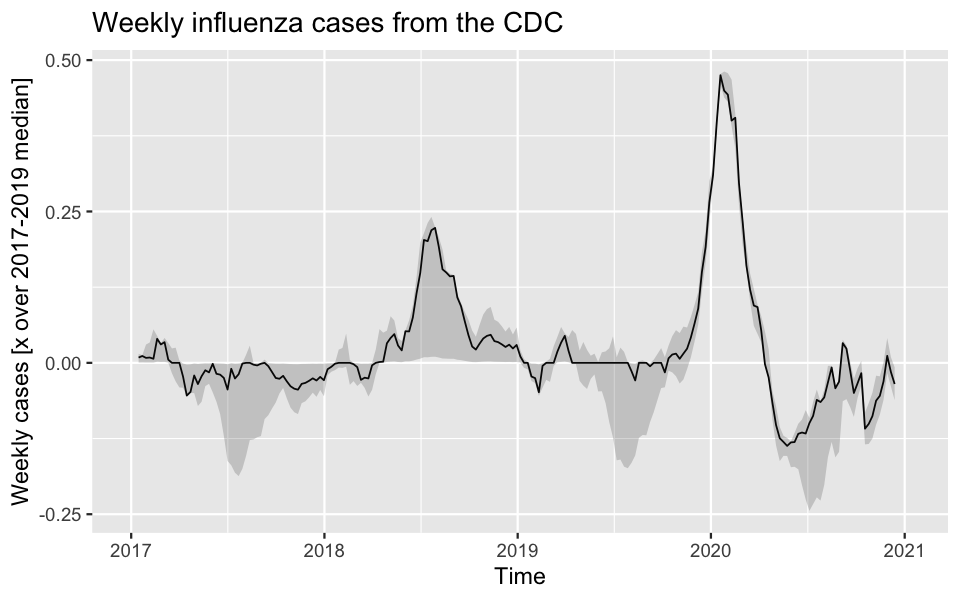

In [46]:
options(repr.plot.width=8, repr.plot.height=5)
b = ggplot(data_centered[year(data_centered$WeekDate) > 2016,], aes(x=WeekDate, y=centered)) + geom_line() +
 geom_ribbon(aes(ymin=centered_low, ymax=centered_high), alpha = 0.2) +
 labs(x = "Time", y = "Weekly cases [x over 2017-2019 median]", title="Weekly influenza cases from the CDC") + 
theme_gray(base_size = 14) 
b
ggsave("excessUnwellDogs.png", width=8, height=5)

In [ ]:
options(repr.plot.width=8, repr.plot.height=5)
b = ggplot(data_centered[year(data_centered$WeekDate) > 2016,], aes(x=WeekDate, y=centered)) + geom_line() +
 geom_ribbon(aes(ymin=centered_low, ymax=centered_high), alpha = 0.2) +
 labs(x = "Time", y = "Weekly cases [x over 2014-2020 median]", title="Weekly influenza cases from the CDC") + 
theme_gray(base_size = 14) 
b

Warning message:
“Removed 106 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 36 rows containing missing values (`geom_line()`).”


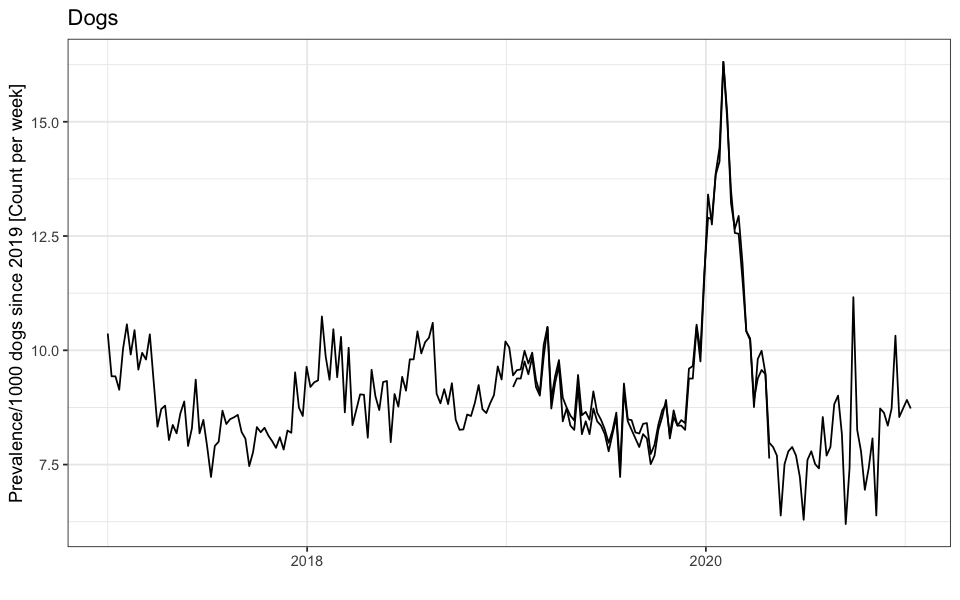

In [34]:
theme_set(theme_bw())
ggplot(data)+
  geom_line(aes(x=WeekDate,y=prevalence_since_2019))+
    geom_line(aes(x=WeekDate,y=Count))+ 
scale_x_date(#limits = c(as.Date("2019-01-01"), NA),
    date_breaks = '2 year', date_labels = '%Y')+
  labs(title = 'Dogs',
       #subtitle ='',
       #caption = '',
       x = '', y="Prevalence/1000 dogs since 2019 [Count per week]")

In [38]:
data$Count = rowMeans(data[,c("prevalence_since_2019", "prop_unwell")], na.rm=T)
data

,date,prevalence_merged_linreg,prop_unwell,prevalence_since_2019,WeekDate,Count,ma
,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>
1,01.01.2017,10.3670,10.3670,NA,2017-01-01,10.3670,NA
2,08.01.2017,9.4312,9.4312,NA,2017-01-08,9.4312,NA
3,15.01.2017,9.4312,9.4312,NA,2017-01-15,9.4312,2.283871
4,22.01.2017,9.1376,9.1376,NA,2017-01-22,9.1376,2.276329
5,29.01.2017,10.0367,10.0367,NA,2017-01-29,10.0367,2.293272
6,05.02.2017,10.5688,10.5688,NA,2017-02-05,10.5688,2.295846
7,12.02.2017,9.9083,9.9083,NA,2017-02-12,9.9083,2.309958
8,19.02.2017,10.4404,10.4404,NA,2017-02-19,10.4404,2.305950
9,26.02.2017,9.5780,9.5780,NA,2017-02-26,9.5780,2.302441
